In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN',
    'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BTTR', 'BYRN', 'CIZN', 'CUBE', 'DTST',
    'DYAI', 'EP', 'FCPT', 'FCUV', 'GBOX', 'GME', 'HMY', 'IEI', 'INTZ',
    'KREF', 'MCVT', 'MICS', 'MNMD', 'OMQS', 'PETV', 'POWW', 'PRPH',
    'RVP', 'VIRT', 'WAVD', 'WKHS', 'ZYXI']
BEST_WEIGHTED = [
    'AMRC', 'COOP', 'CSIQ', 'CTSH', 'CVE', 'ENPH', 'EPSN', 'FKWL',
    'GCBC', 'GGB', 'GGE', 'LFMD', 'NTAP', 'PACB', 'SNEX', 'SOBR', 'TJX',
    'UTHR', 'VTSI']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

75

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-10-15', datetime.date(2022, 10, 15))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  127 of 127 completed
Generating derived columns...
AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CHWY... CIZN... COOP... CRWD... CSIQ... CTSH... CUBE... CVE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... ENPH... EP... EPSN... ETSY... FCPT... FCUV... FKWL... FLGT... GBOX... GCBC... GGB... GGE... GH... GME... GMED... GOOG... HMY... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MSFT... MTCH... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... RVP... SE... SHOP... SNEX... SNOW... SOBR... TASK... TDOC... TEAM... TJX... TREX... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... UTHR... VEEV... VIRT..

In [5]:
data['Date'].tail()

2512   2022-10-10
2513   2022-10-11
2514   2022-10-12
2515   2022-10-13
2516   2022-10-14
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.010270
2       1.004117
3       0.997556
4       0.983429
5       1.000440
          ...   
2512    0.992508
2513    0.993481
2514    0.996709
2515    1.025966
2516    0.976337
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.021303
2,1.014161
3,1.000000
4,1.000000
5,1.005744
...,...
2512,1.001136
2513,1.002765
2514,1.011704
2515,1.022834


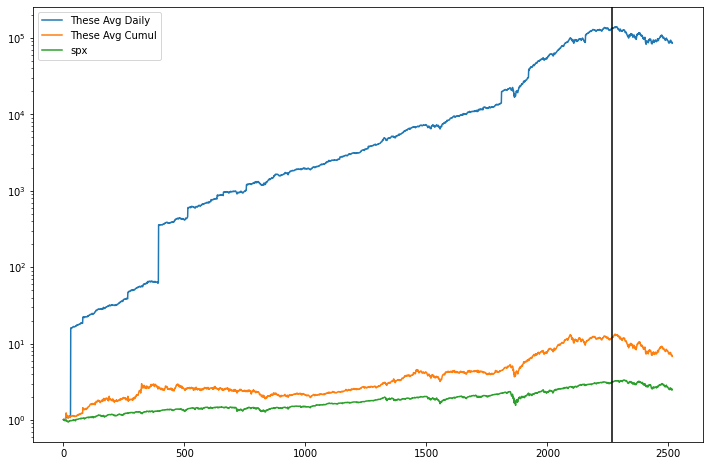

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-10-15,NaN,NaN
1,2012-10-16,1.009877,1.009877
2,2012-10-17,1.019554,1.019657
3,2012-10-18,1.010847,1.010282
4,2012-10-19,0.998925,0.998436


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-10-10,88257.061625,7.115850
2513,2022-10-11,87234.300235,6.997933
2514,2022-10-12,87532.975579,6.983174
2515,2022-10-13,88375.984817,7.066363
2516,2022-10-14,85233.710050,6.796756


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

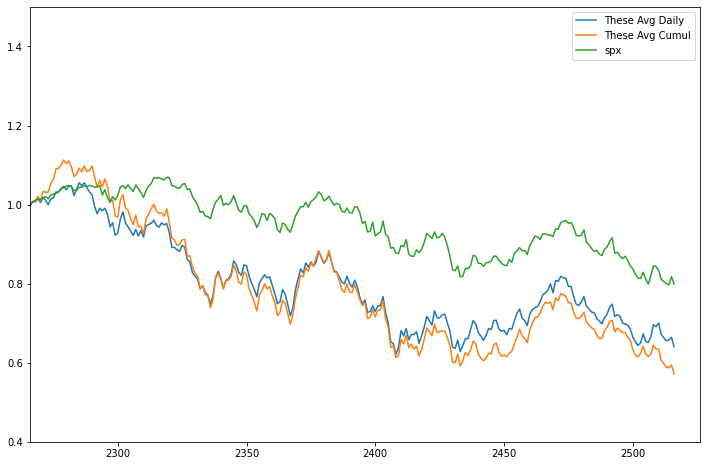

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,77.320000,77.320000,82.500000,75.690002,82.500000,4.347953,0.937212,0.927210,0.989327
2458,75.139999,75.139999,77.544998,74.230003,77.540001,4.319353,0.969048,0.971805,1.002845
2459,71.820000,71.820000,74.000000,71.279999,74.000000,4.274163,0.970541,0.955816,0.984828
2460,76.919998,76.919998,77.389999,72.970001,73.800003,4.342766,1.042276,1.071011,1.027569
2461,76.779999,76.779999,78.500000,74.333000,75.879997,4.340944,1.011861,0.998180,0.986479


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,77.320000,77.320000,82.500000,75.690002
2458,75.139999,75.139999,77.544998,74.230003
2459,71.820000,71.820000,74.000000,71.279999
2460,76.919998,76.919998,77.389999,72.970001
2461,76.779999,76.779999,78.500000,74.333000


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,77.320000,77.320000,82.500000,75.690002,77.544998,74.230003,1.002910,0.960036
2458,75.139999,75.139999,77.544998,74.230003,74.000000,71.279999,0.984828,0.948629
2459,71.820000,71.820000,74.000000,71.279999,77.389999,72.970001,1.077555,1.016012
2460,76.919998,76.919998,77.389999,72.970001,78.500000,74.333000,1.020541,0.966368
2461,76.779999,76.779999,78.500000,74.333000,78.651001,75.330002,1.024368,0.981115


0.05    0.972027
Name: HighMult, dtype: float64


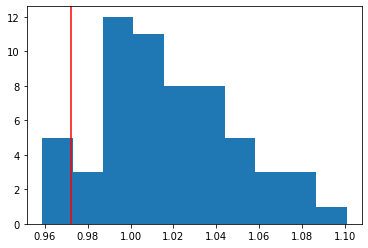

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


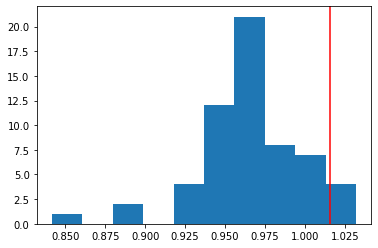

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9720266298930161)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.012031629887652, 0.9896874903139407)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,77.320000,77.320000,82.500000,75.690002,77.544998,74.230003,1.002910,0.960036,0
2458,75.139999,75.139999,77.544998,74.230003,74.000000,71.279999,0.984828,0.948629,0
2459,71.820000,71.820000,74.000000,71.279999,77.389999,72.970001,1.077555,1.016012,0
2460,76.919998,76.919998,77.389999,72.970001,78.500000,74.333000,1.020541,0.966368,1
2461,76.779999,76.779999,78.500000,74.333000,78.651001,75.330002,1.024368,0.981115,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0116126090611597, 0.9658287425464674, 1.018141084538672, 0.9777408229867024)

In [27]:
get_hilo_mults(aapl)

(1.0120886938436335,
 0.9972795758817702,
 1.0056316347202565,
 0.9838124332220579)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.012089,0.997280,1.005632,0.983812
1,ABMD,1.001276,0.988804,1.002693,0.993015
2,ABNB,1.015229,0.983961,1.013114,0.992774
3,ADBE,1.008535,0.988857,1.010722,0.971769
4,ADYEY,1.022274,0.954252,1.033112,0.964839


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,138.380005,AAPL
ABMD,249.279999,ABMD
ABNB,109.160004,ABNB
ADBE,287.940002,ADBE
ADYEY,12.25,ADYEY
...,...,...
ZM,72.290001,ZM
ZYXI,8.73,ZYXI
^GSPC,3583.070068,^GSPC
^IXIC,10321.388672,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.012089,0.997280,1.005632,0.983812,138.380005
1,ABMD,1.001276,0.988804,1.002693,0.993015,249.279999
2,ABNB,1.015229,0.983961,1.013114,0.992774,109.160004
3,ADBE,1.008535,0.988857,1.010722,0.971769,287.940002
4,ADYEY,1.022274,0.954252,1.033112,0.964839,12.25


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv